In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
# Initial parameters
C_0 = 1.02e6  # Initial customers (1.02 million)
M_0 = 15  # Initial capital in million INR
M_marketing_initial = 5  # Initial marketing spend in million INR
AOV = 300  # Average Order Value in INR
profit_margin = 0.20  # 20% profit margin
days = 30  # Duration of the growth strategy

In [45]:
results = []

# Define equations based on problem statement
def calculate_p(m_i):
    return 0.8 * (1.25 - np.exp(-m_i / 5))

In [46]:
def calculate_growth_factor(p, M_i, M_0):
    return (38 / 40) + (1 / 40) * ((0.45 + p) ** 0.3 + (M_i / (M_0 + 1)) ** 0.05)

In [47]:
# Initial conditions
C_prev = C_0
capital_available = M_0

In [48]:
# Iteratively calculate each day's metrics
for i in range(1, days + 1):
    # Assume 20% of available capital goes to delivery improvement, 40% to marketing
    m_i = 0.2 * capital_available  # Daily investment in delivery improvement
    M_i = 0.4 * capital_available  # Daily marketing spend
    
    # Calculate probability `p` and growth factor `G`
    p = calculate_p(m_i)
    G = calculate_growth_factor(p, M_i, M_marketing_initial)
    
    # Calculate customers for the day and total orders
    C_i = G * C_prev
    total_orders = C_i * 7 / 30  # Weekly order frequency normalized per day
    
    # Calculate revenue and update capital available
    revenue = total_orders * AOV * profit_margin / 1e6  # in million INR
    capital_end_day = capital_available - (m_i + M_i) + revenue
    
    # Store the day's results
    results.append({
        "Day": i,
        "Capital Available at Start": capital_available,
        "Customers at Start (C_prev)": C_prev,
        "Delivery Investment (m_i)": m_i,
        "Probability (p)": p,
        "Marketing Spend (M_i)": M_i,
        "Growth Factor (G)": G,
        "Customers at End (C_i)": C_i,
        "Total Orders": total_orders,
        "Capital Available at End": capital_end_day
    })
    
    # Update for next iteration
    C_prev = C_i
    capital_available = capital_end_day

In [49]:
df_results = pd.DataFrame(results)
df_results.to_csv("30_day_growth_strategy.csv", index=False)

df_results

,Day,Capital Available at Start,Customers at Start (C_prev),Delivery Investment (m_i),Probability (p),Marketing Spend (M_i),Growth Factor (G),Customers at End (C_i),Total Orders,Capital Available at End
0,1,15.000000,1.020000e+06,3.000000,0.560951,6.000000,1.000082,1.020083e+06,238019.472527,20.281168
1,2,20.281168,1.020083e+06,4.056234,0.644557,8.112467,1.001067,1.021172e+06,238273.391839,22.408871
2,3,22.408871,1.021172e+06,4.481774,0.673556,8.963548,1.001396,1.022597e+06,238606.025946,23.279910
3,4,23.279910,1.022597e+06,4.655982,0.684734,9.311964,1.001522,1.024153e+06,238969.112845,23.650111
4,5,23.650111,1.024153e+06,4.730022,0.689369,9.460044,1.001574,1.025765e+06,239345.163018,23.820754
5,6,23.820754,1.025765e+06,4.764151,0.691482,9.528302,1.001597,1.027403e+06,239727.465638,23.911950
6,7,23.911950,1.027403e+06,4.782390,0.692605,9.564780,1.001610,1.029057e+06,240113.391281,23.971583
7,8,23.971583,1.029057e+06,4.794317,0.693337,9.588633,1.001618,1.030722e+06,240501.904591,24.018748
8,9,24.018748,1.030722e+06,4.803750,0.693915,9.607499,1.001625,1.032397e+06,240892.600569,24.061055
9,10,24.061055,1.032397e+06,4.812211,0.694433,9.624422,1.001630,1.034080e+06,241285.324734,24.101542


In [50]:

# Load the order frequency data file to examine its contents
order_frequency_path = '30_day_growth_strategy.csv'
order_frequency_data = pd.read_csv(order_frequency_path)

In [51]:
import matplotlib.pyplot as plt

# Extract relevant columns for analysis
days = order_frequency_data['Day']
capital_start = order_frequency_data['Capital Available at Start']
capital_end = order_frequency_data['Capital Available at End']
customers_start = order_frequency_data['Customers at Start (C_prev)']
customers_end = order_frequency_data['Customers at End (C_i)']
delivery_investment = order_frequency_data['Delivery Investment (m_i)']
probability_p = order_frequency_data['Probability (p)']
marketing_spend = order_frequency_data['Marketing Spend (M_i)']
growth_factor = order_frequency_data['Growth Factor (G)']
total_orders = order_frequency_data['Total Orders']



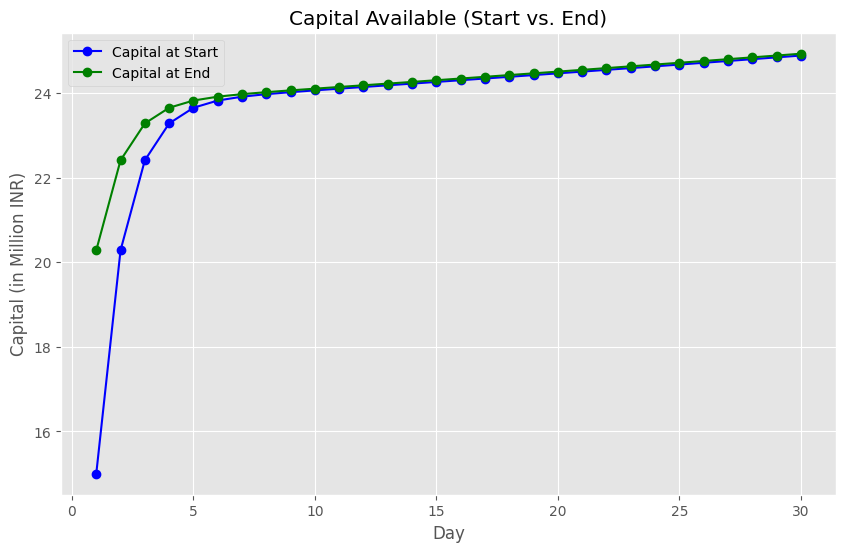

In [52]:
plt.figure(figsize=(10, 6))
plt.plot(days, capital_start, label='Capital at Start', color='blue', marker='o')
plt.plot(days, capital_end, label='Capital at End', color='green',marker='o')
plt.title("Capital Available (Start vs. End)")
plt.xlabel("Day")
plt.ylabel("Capital (in Million INR)")
plt.legend()
plt.show()


# Capital Available (Start vs. End)
Observation: The capital at the start and end of each day shows steady growth, ending with approximately 24.93 million INR remaining on day 30. This trend indicates a balanced allocation between delivery improvements and marketing, with a prudent approach that avoids depleting capital.

Recommendations:
Increase Investment Near Period End: With substantial capital remaining, consider increasing spending in the last 10 days on delivery and marketing. This could further boost customer acquisition and delivery success rates toward the end of the strategy period.


Reserve for High-impact Days: Allocating higher budgets for certain peak or high-traffic days may maximize ROI on both delivery and marketing investments, making better use of available capital.

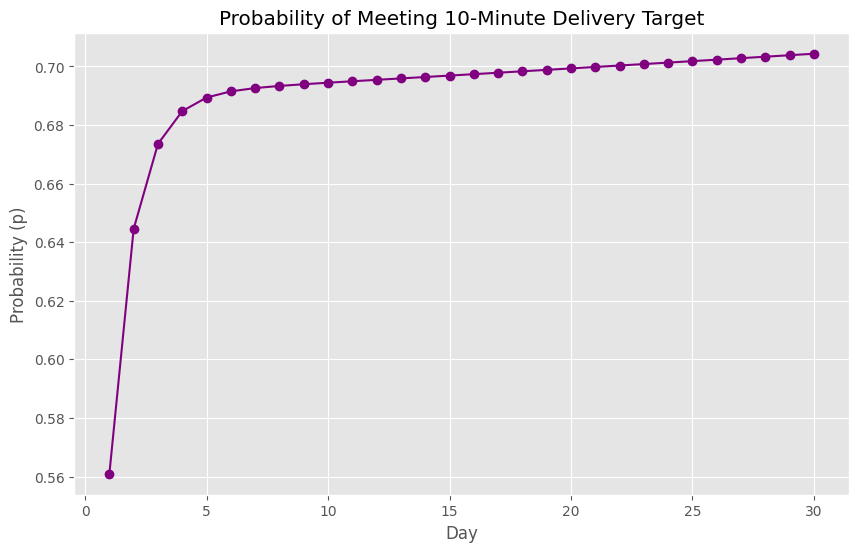

In [53]:
# Plot 2: Probability of Meeting 10-Minute Delivery Target
plt.figure(figsize=(10, 6))
plt.plot(days, probability_p, color='purple',marker='o')
plt.title("Probability of Meeting 10-Minute Delivery Target")
plt.xlabel("Day")
plt.ylabel("Probability (p)")
plt.show()

### Probability of Meeting 10-Minute Delivery Target
Observation: The probability p gradually increases, reaching 0.704 by the end of the period. This trend suggests that steady investments in delivery improvements have effectively enhanced the chances of meeting the 10-minute delivery target, but there’s still room to improve.

Recommendations:

Optimize Investment Impact: If possible, analyze which days have seen the highest jumps in p to refine delivery spending on days with the best ROI.

Increase Incremental Investment: For further gains in delivery probability, increasing incremental spending slightly in the last week may help push p closer to 0.8, enhancing the customer experience and likelihood of repeat orders.

Target Specific Geographic Areas: To efficiently improve p, consider directing delivery investments toward high-density or challenging delivery areas where meeting the 10-minute target could have a more significant impact on customer satisfaction.

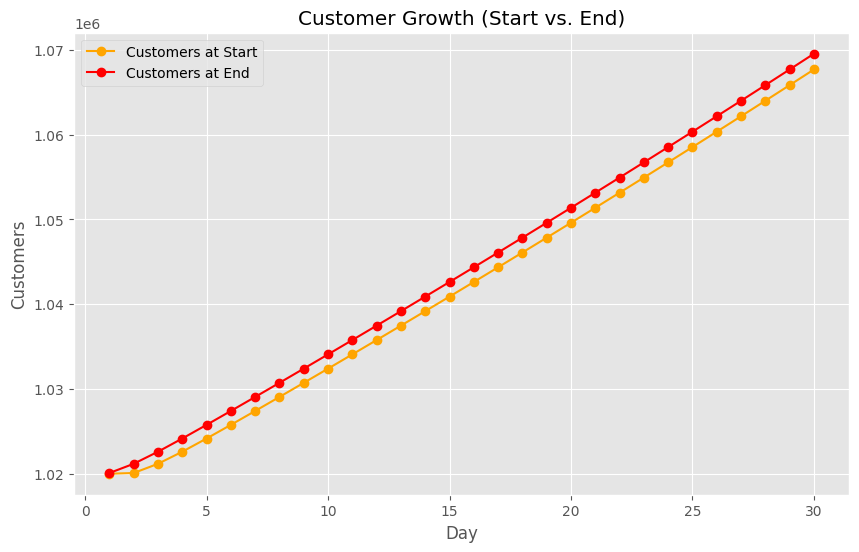

In [54]:
plt.figure(figsize=(10, 6))
plt.plot(days, customers_start, label='Customers at Start', color='orange',marker='o')
plt.plot(days, customers_end, label='Customers at End', color='red',marker='o')
plt.title("Customer Growth (Start vs. End)")
plt.xlabel("Day")
plt.ylabel("Customers")
plt.legend()
plt.show()

## Customer Growth (Start vs. End)
Observation: The number of customers steadily grows each day, ending with around 1,069,552 customers. This consistent growth pattern confirms that the combined investments in delivery and marketing are effectively driving customer acquisition.

Recommendations:

Increase Marketing in Later Days: As customer awareness and brand familiarity increase, increasing marketing spend in the last 10 days could capitalize on the momentum, drawing more new customers as trust grows.

Encourage Repeat Orders: Focus on existing customers by promoting loyalty programs or discounts to incentivize more frequent orders. This approach can boost customer lifetime value without necessarily increasing acquisition costs.

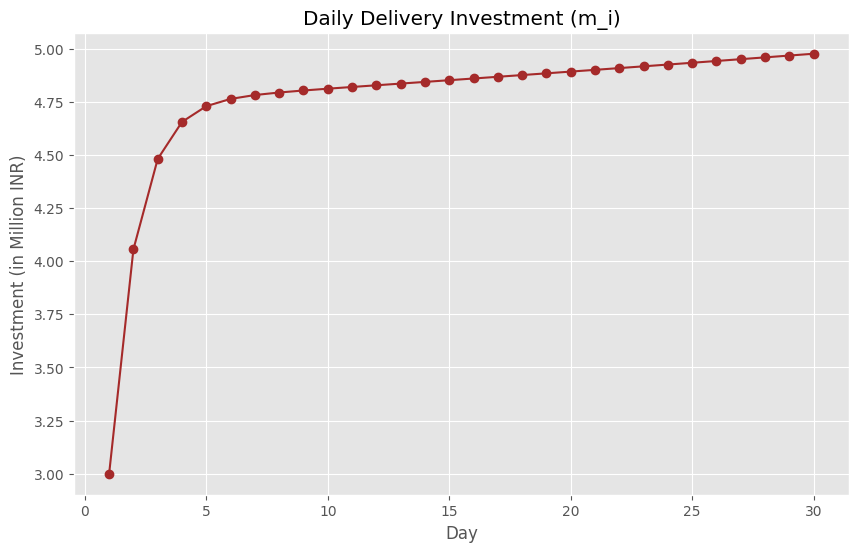

In [55]:
plt.figure(figsize=(10, 6))
plt.plot(days, delivery_investment, color='brown',marker='o')
plt.title("Daily Delivery Investment (m_i)")
plt.xlabel("Day")
plt.ylabel("Investment (in Million INR)")
plt.show()


## Daily Delivery Investment (m_i)
Observation: The delivery investment 𝑚_𝑖 remains stable over time, reflecting a balanced approach to maintaining steady growth in delivery success probability. However, consistent values suggest a conservative allocation.

Recommendations:

Optimize Delivery Investment with Targeted Increases: Consider increasing 
𝑚_𝑖 on specific high-traffic or peak days to see if it results in a noticeable boost in 𝑝.

Test Lower Spend Thresholds: Experiment with days of slightly reduced delivery investment to understand if certain days require less funding, which could free up capital for other growth initiatives.

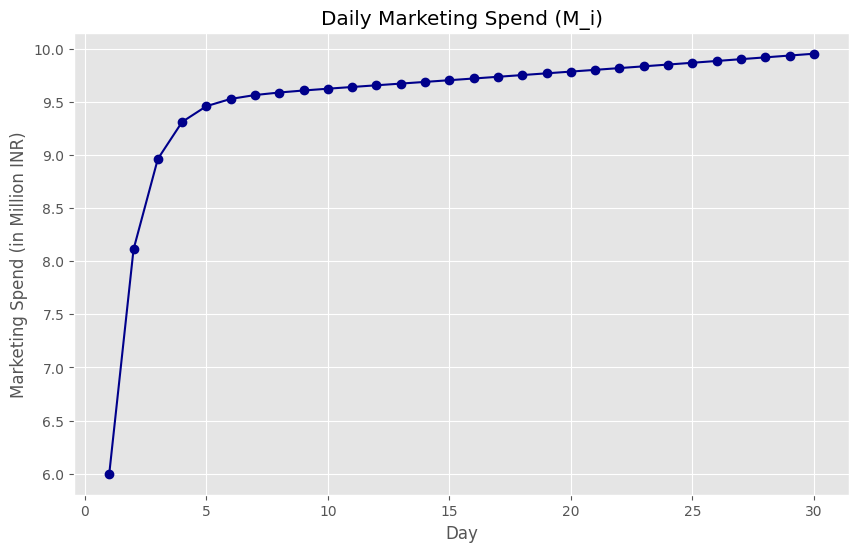

In [56]:
plt.figure(figsize=(10, 6))
plt.plot(days, marketing_spend, color='darkblue',marker='o')
plt.title("Daily Marketing Spend (M_i)")
plt.xlabel("Day")
plt.ylabel("Marketing Spend (in Million INR)")
plt.show()

## Daily Marketing Spend (M_i)
Observation: The marketing spend remains consistent, supporting a steady increase in customer base and total orders over the period.

Recommendations:

Test Dynamic Allocation: Introducing a dynamic allocation model that increases marketing spend towards the period’s end may yield a larger customer base by capturing customers when brand recognition peaks.

Focus on Retargeting Campaigns: Since some of the customer base is established, consider allocating a portion of marketing spend towards retargeting existing customers for repeat purchases, which could improve revenue without new acquisition costs.

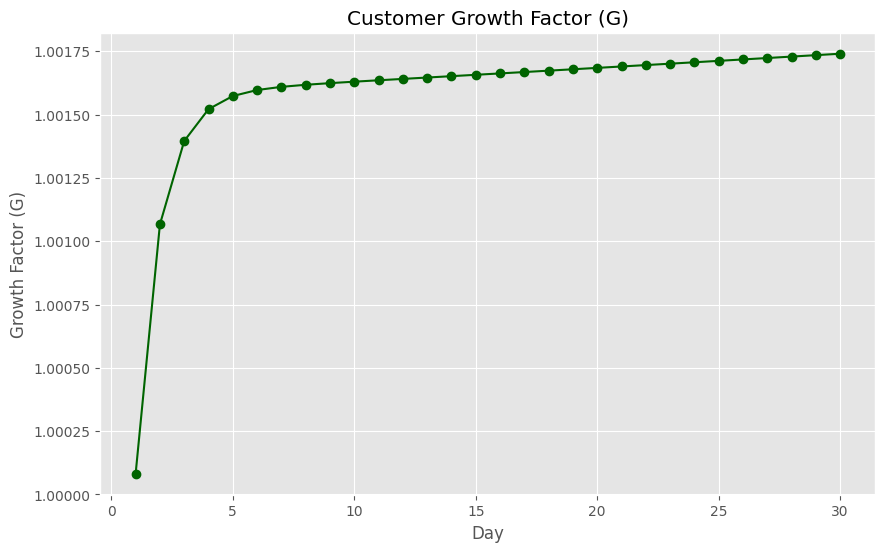

In [57]:
# Plot 6: Customer Growth Factor
plt.figure(figsize=(10, 6))
plt.plot(days, growth_factor, color='darkgreen',marker='o')
plt.title("Customer Growth Factor (G)")
plt.xlabel("Day")
plt.ylabel("Growth Factor (G)")
plt.show()

## Customer Growth Factor (G)
Observation: The growth factor 𝐺 remains close to 1.0, indicating stable, incremental growth. This factor contributes to consistent daily increases in the customer base without large spikes.

Recommendations:

Increase Marketing and Delivery Spend: To push the growth factor slightly higher, consider increasing daily investments in both marketing and delivery. A growth factor above 1.01 toward the end of the period could yield a substantial cumulative increase.

Leverage High-Growth Days: Identify which days had the highest 𝐺 values and analyze why. This insight could reveal specific times when growth was more responsive, allowing targeted allocation for maximum impact on similar days in future periods.